# Laptop Price Prediction Using Linear Regression

## Dataset link : https://www.kaggle.com/datasets/ali91saif/laptop-price-estimationused

### What is Linear Regression ?
####  Regression models are supervised learning models that are generally used when the value to be predicted is of discrete or quantitative nature.

### y=mx+c

## Step 1 : Reading Dataset and Loading Libraries

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("Laptop_Price_Dataset.csv",encoding = "ISO-8859-1")

In [3]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,1599.00
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,799.00
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,638.80
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6kg,1599.00


## Step 2 : Understand About Data and Features

In [4]:
df.shape

(1099, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Ram               1099 non-null   object 
 8   Memory            1099 non-null   object 
 9   Gpu               1099 non-null   object 
 10  OpSys             1099 non-null   object 
 11  Weight            1099 non-null   object 
 12  Price_euros       1099 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 111.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
# Price Euros to Rupees
# 1 Euro = 91.21 rupees
df['Price']=df['Price_euros'].apply(lambda x:x*91.21)
df['Price']

0       122193.1249
1        81992.3174
2        52445.7500
3       231440.8145
4       164506.3560
           ...     
1094    145844.7900
1095     72876.7900
1096     58264.9480
1097    145844.7900
1098     45605.0000
Name: Price, Length: 1099, dtype: float64

In [9]:
df.drop(columns=['Price_euros'],inplace=True)

In [10]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,122193.1249
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,81992.3174
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,52445.7500
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,231440.8145
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,164506.3560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 7,2.4kg,145844.7900
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.4kg,72876.7900
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,58264.9480
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.6kg,145844.7900


In [11]:
# 2^8=256
df['RAM']=df['Ram'].str.replace('GB','').astype('int8')
df['Weight']=df['Weight'].str.replace('kg','').astype('float32')

In [12]:
df.drop(columns=['Ram'],inplace=True)

In [13]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,RAM
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,8
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,8
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,8
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,16
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,4
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,8
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,8
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Memory            1099 non-null   object 
 8   Gpu               1099 non-null   object 
 9   OpSys             1099 non-null   object 
 10  Weight            1099 non-null   float32
 11  Price             1099 non-null   float64
 12  RAM               1099 non-null   int8   
dtypes: float32(1), float64(2), int64(1), int8(1), object(8)
memory usage: 99.9+ KB


## Step 3 : Visualizing Data

In [15]:
# EDA 
# Univarient 
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aumka\AppData\Local\Temp\ipykernel_5732\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

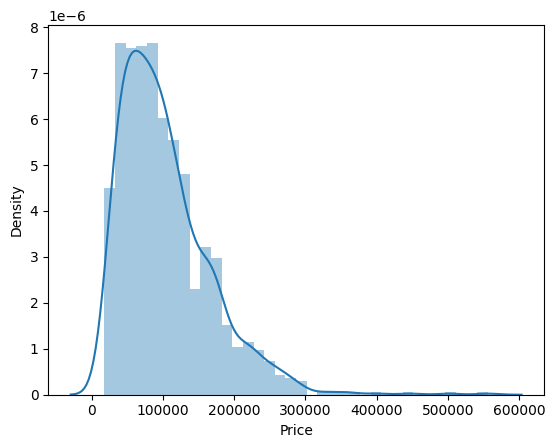

In [16]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

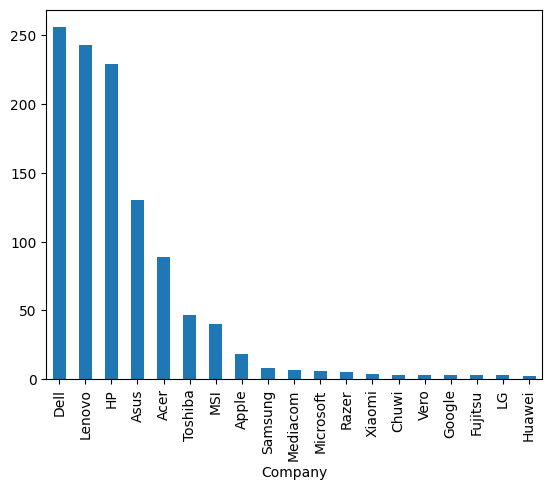

In [17]:
df['Company'].value_counts().plot(kind='bar')

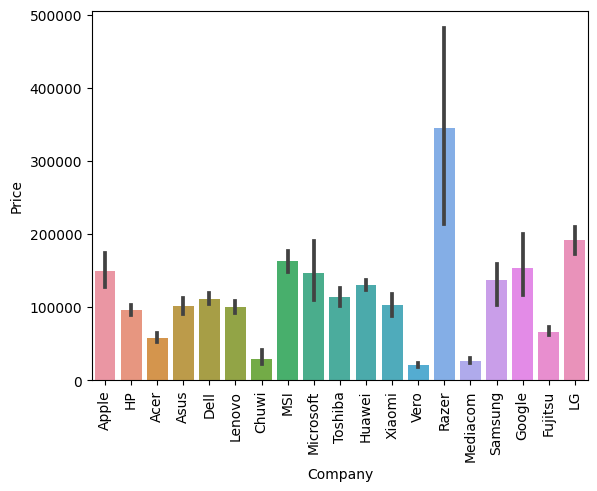

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

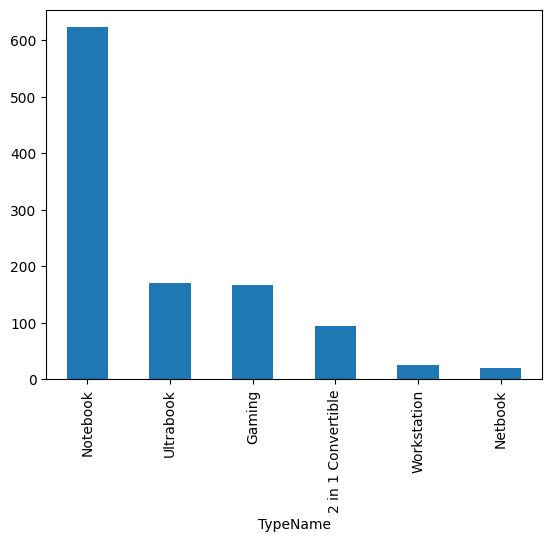

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

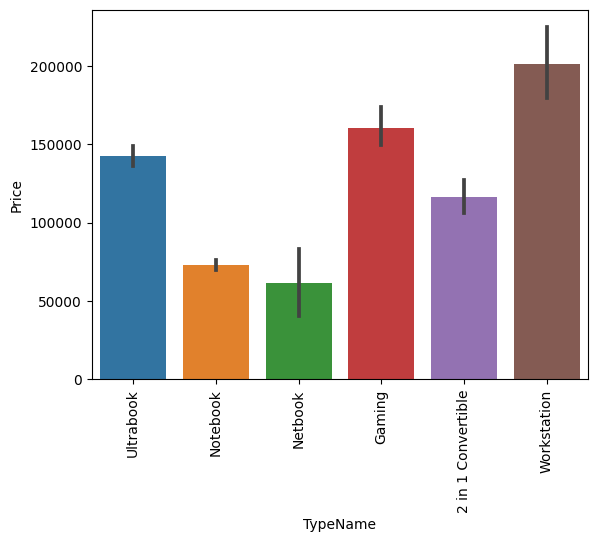

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\aumka\AppData\Local\Temp\ipykernel_5732\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

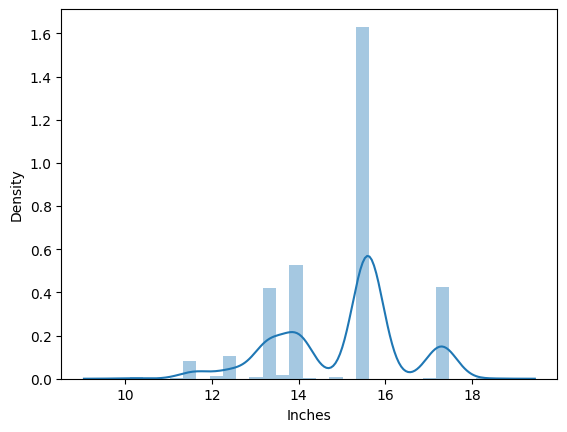

In [21]:
sns.distplot(df['Inches'])

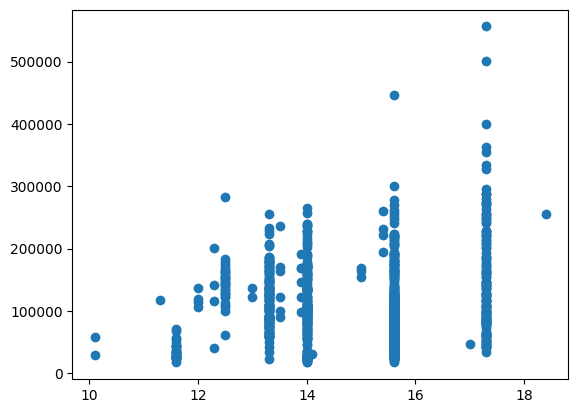

In [22]:
plt.scatter(x=df['Inches'],y=df['Price'])

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                447
1366x768                                         214
IPS Panel Full HD 1920x1080                      197
IPS Panel Full HD / Touchscreen 1920x1080         42
Full HD / Touchscreen 1920x1080                   40
1600x900                                          20
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Quad HD+ / Touchscreen 3200x1800                  10
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
1440x900                                           4
IPS Panel Retina Display 2304x1440                 4
IPS Panel Retina Display 2880

## STEP 4 : Feature Engineering

In [24]:
df['isTouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'touchscreen' in x.lower() else 0)

In [25]:
df.loc[df['isTouchScreen']==1]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,RAM,isTouchScreen
19,20,Dell,XPS 13,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,89294.5900,8,1
23,24,Dell,Inspiron 5379,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,74700.9900,8,1
33,34,Dell,XPS 13,Ultrabook,13.3,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,170471.4900,16,1
44,45,Dell,Inspiron 7773,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,91118.7900,12,1
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,29095.9900,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058,1072,Dell,Inspiron 7378,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,118481.7900,12,1
1067,1082,Dell,Inspiron 5368,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,72786.4921,8,1
1074,1089,Lenovo,ThinkPad Yoga,Ultrabook,12.5,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,156287.4229,8,1
1080,1095,Lenovo,Yoga 900S-12ISK,Ultrabook,12.5,IPS Panel Touchscreen 2560x1440,Intel Core M 6Y75 1.2GHz,512GB SSD,Intel HD Graphics 515,Windows 10,0.99,127602.7900,8,1


<Axes: xlabel='isTouchScreen'>

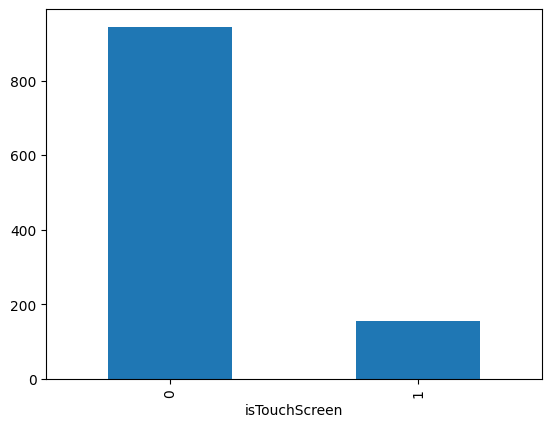

In [26]:
df['isTouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='isTouchScreen', ylabel='Price'>

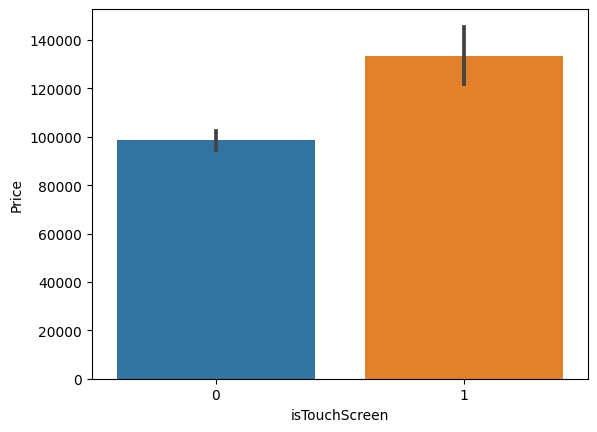

In [27]:
sns.barplot(x=df['isTouchScreen'],y=df['Price'])

In [28]:
df['isIPS']=df['ScreenResolution'].apply(lambda x: 1 if 'ips' in x.lower() else 0)

<Axes: xlabel='isIPS'>

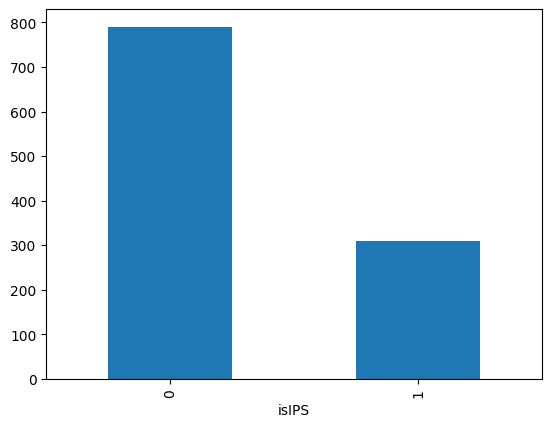

In [29]:
df['isIPS'].value_counts().plot(kind='bar')

In [30]:
temp=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['X_res']=temp[0]
df['Y_res']=temp[1]

In [32]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,RAM,isTouchScreen,isIPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,8,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,8,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,8,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,16,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,8,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,4,0,0,1366,768
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,8,0,0,Full HD 1920,1080
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,8,0,0,Full HD 1920,1080
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,8,0,0,Full HD 1920,1080


In [33]:
df['X_res'].value_counts()

X_res
Full HD 1920                                447
1366                                        214
IPS Panel Full HD 1920                      198
IPS Panel Full HD / Touchscreen 1920         42
Full HD / Touchscreen 1920                   40
1600                                         20
Touchscreen 1366                             15
IPS Panel 4K Ultra HD 3840                   12
IPS Panel 4K Ultra HD / Touchscreen 3840     11
4K Ultra HD / Touchscreen 3840               10
Quad HD+ / Touchscreen 3200                  10
IPS Panel 1366                                7
4K Ultra HD 3840                              6
IPS Panel Retina Display 2560                 6
Touchscreen 2256                              6
Touchscreen 2560                              5
1440                                          4
IPS Panel Retina Display 2304                 4
IPS Panel Retina Display 2880                 4
IPS Panel 2560                                4
Touchscreen 2400                  

In [34]:
df['X_res']=df['X_res'].str.findall(r'\d\d+').apply(lambda x:x[0])

In [35]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Memory,Gpu,OpSys,Weight,Price,RAM,isTouchScreen,isIPS,X_res,Y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,8,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,8,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,8,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,16,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,8,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,4,0,0,1366,768
1095,1110,Acer,Aspire F5-573G,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,8,0,0,1920,1080
1096,1111,Dell,Inspiron 5567,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,8,0,0,1920,1080
1097,1112,MSI,GS70 Stealth,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,8,0,0,1920,1080


In [36]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1099 non-null   int64  
 1   Company           1099 non-null   object 
 2   Product           1099 non-null   object 
 3   TypeName          1099 non-null   object 
 4   Inches            1099 non-null   float64
 5   ScreenResolution  1099 non-null   object 
 6   Cpu               1099 non-null   object 
 7   Memory            1099 non-null   object 
 8   Gpu               1099 non-null   object 
 9   OpSys             1099 non-null   object 
 10  Weight            1099 non-null   float32
 11  Price             1099 non-null   float64
 12  RAM               1099 non-null   int8   
 13  isTouchScreen     1099 non-null   int64  
 14  isIPS             1099 non-null   int64  
 15  X_res             1099 non-null   int32  
 16  Y_res             1099 non-null   int32  


In [37]:
df.drop(columns=['ScreenResolution'],inplace=True)

### Finding Correlations

In [38]:
numerical_cols=['Inches','RAM','Price','isTouchScreen','isIPS','X_res','Y_res']

In [39]:
df[numerical_cols].corr()['Price']

Inches           0.073223
RAM              0.750755
Price            1.000000
isTouchScreen    0.191558
isIPS            0.242458
X_res            0.565792
Y_res            0.563539
Name: Price, dtype: float64

In [40]:
df['PPI']=pow(pow(df['X_res'],2)+pow(df['Y_res'],2),0.5)/df['Inches']

In [41]:
numerical_cols.append('PPI')

In [42]:
df[numerical_cols].corr()['Price']

Inches           0.073223
RAM              0.750755
Price            1.000000
isTouchScreen    0.191558
isIPS            0.242458
X_res            0.565792
Y_res            0.563539
PPI              0.485813
Name: Price, dtype: float64

In [43]:
df.drop(columns=['X_res','Y_res','Inches'],inplace=True)

In [44]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              177
Intel Core i7 7700HQ 2.8GHz             130
Intel Core i7 7500U 2.7GHz              118
Intel Core i5 8250U 1.6GHz               72
Intel Core i7 8550U 1.8GHz               71
                                       ... 
Intel Celeron Dual Core N3350 2.0GHz      1
Intel Core M m3 1.2GHz                    1
Intel Core i7 2.8GHz                      1
Intel Core i5 2.9GHz                      1
Intel Pentium Quad Core N3700 1.6GHz      1
Name: count, Length: 111, dtype: int64

In [45]:
df['CPU Name']=df['Cpu'].apply(lambda x:' '.join(x.split()[:3]))

In [46]:
df['CPU Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1094         Intel Core i5
1095         Intel Core i5
1096         Intel Core i5
1097         Intel Core i7
1098    Intel Pentium Quad
Name: CPU Name, Length: 1099, dtype: object

In [47]:
def getProcessor(text):
    if 'intel core i' in text.lower():
        return text
    else:
        if text.split()[0].lower()=='intel':
            return 'Old Intel Processor'
    return 'AMD Processor'

In [48]:
df["CPU Company"]=df['CPU Name'].apply(getProcessor)

In [49]:
df['CPU Company'].value_counts()

CPU Company
Intel Core i7          430
Intel Core i5          384
Old Intel Processor    119
Intel Core i3          114
AMD Processor           52
Name: count, dtype: int64

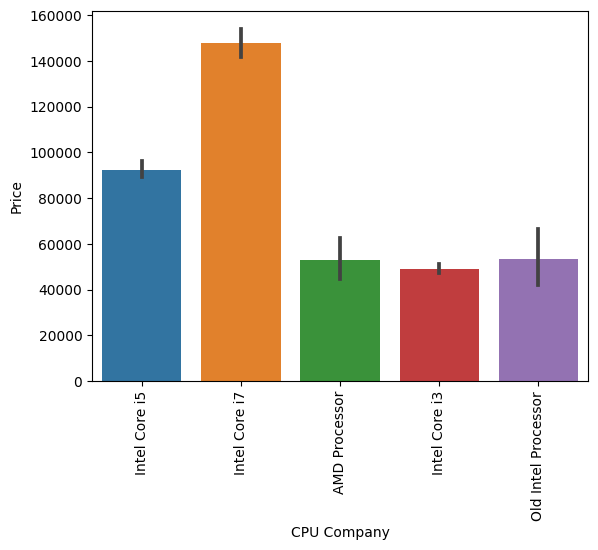

In [50]:
sns.barplot(x=df['CPU Company'],y=df["Price"])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
df.drop(columns=['Cpu','CPU Name'],inplace=True)

<Axes: xlabel='RAM'>

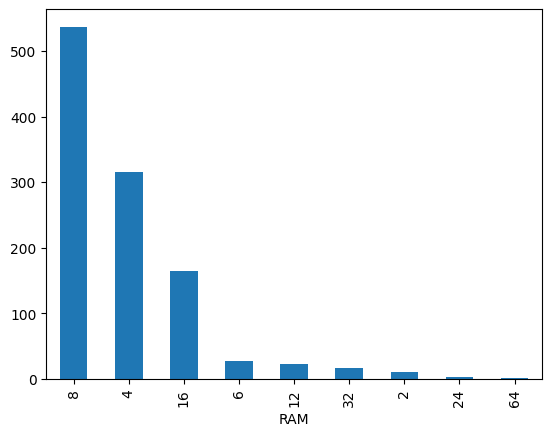

In [52]:
df['RAM'].value_counts().plot(kind='bar')

In [53]:
df['Memory'].value_counts()

Memory
256GB SSD                        366
1TB HDD                          184
500GB HDD                        100
512GB SSD                         97
128GB SSD +  1TB HDD              76
128GB SSD                         68
256GB SSD +  1TB HDD              61
32GB Flash Storage                31
2TB HDD                           15
1TB SSD                           13
512GB SSD +  1TB HDD              13
256GB SSD +  2TB HDD              10
64GB Flash Storage                10
16GB Flash Storage                 7
256GB Flash Storage                6
32GB SSD                           5
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
1.0TB Hybrid                       2
256GB SSD +  256GB SSD             2
512GB SSD +  512GB SSD             1
512GB SSD +  256GB SSD         

In [54]:
import re

In [55]:
hdd_pattren=re.compile('(\d+).+hdd')
ssd_pattern=re.compile('(\d+).+ssd')
hybrid_pattern=re.compile('(\d+).+hybrid')
flash_pattern=re.compile('(\d+).+flash storage')
def getHDDValue(x):
    value=0
    if 'hybrid' not in x.lower():
        txt=x.split('+')
        for i in txt:
            a=i.lower().strip()
            if a.endswith('hdd'):
                if 'tb' in a:
                    value=int(hdd_pattren.findall(a)[0])*1000
                elif 'gb' in i.lower():
                    value=int(hdd_pattren.findall(a)[0])
    return value

def getSSDValue(x):
    value=0
    if 'hybrid' not in x.lower():
        txt=x.split('+')
        for i in txt:
            a=i.lower().strip()
            if a.endswith('ssd'):
                if 'tb' in a:
                    value=int(ssd_pattern.findall(a)[0])*1000
                elif 'gb' in i.lower():
                    value=int(ssd_pattern.findall(a)[0])
    return value

def getHybridValue(x):
    value=0
    if 'hybrid' in x.lower():
        txt=x.split('+')
        for i in txt:
            a=i.lower().strip()
            if a.endswith('hybrid'):
                if 'tb' in a:
                    value=int(hybrid_pattern.findall(a)[0])*1000
                elif 'gb' in i.lower():
                    value=int(hybrid_pattern.findall(a)[0])
    return value

def getFlashValue(x):
    value=0
    txt=x.split('+')
    for i in txt:
        a=i.lower().strip()
        if a.endswith('flash storage'):
            if 'tb' in a:
                value=int(flash_pattern.findall(a)[0])*1000
            elif 'gb' in i.lower():
                value=int(flash_pattern.findall(a)[0])
    return value

In [56]:
getHDDValue('128GB Flash Storage')

0

In [57]:
df['Flash Storage']=df['Memory'].apply(getFlashValue)
df['SSD']=df['Memory'].apply(getSSDValue)
df['HDD']=df['Memory'].apply(getHDDValue)
df['Hybrid']=df['Memory'].apply(getHybridValue)

In [58]:
df

,laptop_ID,Company,Product,TypeName,Memory,Gpu,OpSys,Weight,Price,RAM,isTouchScreen,isIPS,PPI,CPU Company,Flash Storage,SSD,HDD,Hybrid
0,1,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,8,0,1,226.983005,Intel Core i5,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,8,0,0,127.677940,Intel Core i5,128,0,0,0
2,3,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,8,0,0,141.211998,Intel Core i5,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,16,0,1,220.534624,Intel Core i7,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,8,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,4,0,0,125.367428,Intel Core i5,0,128,0,0
1095,1110,Acer,Aspire F5-573G,Notebook,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,8,0,0,141.211998,Intel Core i5,0,256,1000,0
1096,1111,Dell,Inspiron 5567,Notebook,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,8,0,0,141.211998,Intel Core i5,0,0,1000,0
1097,1112,MSI,GS70 Stealth,Gaming,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,8,0,0,127.335675,Intel Core i7,0,256,0,0


In [59]:
numerical_cols+=['Flash Storage','SSD','HDD','Hybrid']
numerical_cols

['Inches',
 'RAM',
 'Price',
 'isTouchScreen',
 'isIPS',
 'X_res',
 'Y_res',
 'PPI',
 'Flash Storage',
 'SSD',
 'HDD',
 'Hybrid']

In [60]:
numerical_cols=numerical_cols[:12]
numerical_cols.remove('Y_res')

In [61]:
numerical_cols

['Inches',
 'RAM',
 'Price',
 'isTouchScreen',
 'isIPS',
 'X_res',
 'PPI',
 'Flash Storage',
 'SSD',
 'HDD',
 'Hybrid']

In [62]:
# df[numerical_cols].corr()['Price']

In [63]:
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [64]:
df

,laptop_ID,Company,Product,TypeName,Memory,Gpu,OpSys,Weight,Price,RAM,isTouchScreen,isIPS,PPI,CPU Company,SSD,HDD
0,1,Apple,MacBook Pro,Ultrabook,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,122193.1249,8,0,1,226.983005,Intel Core i5,128,0
1,2,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,81992.3174,8,0,0,127.677940,Intel Core i5,0,0
2,3,HP,250 G6,Notebook,256GB SSD,Intel HD Graphics 620,No OS,1.86,52445.7500,8,0,0,141.211998,Intel Core i5,256,0
3,4,Apple,MacBook Pro,Ultrabook,512GB SSD,AMD Radeon Pro 455,macOS,1.83,231440.8145,16,0,1,220.534624,Intel Core i7,512,0
4,5,Apple,MacBook Pro,Ultrabook,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,164506.3560,8,0,1,226.983005,Intel Core i5,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,128GB SSD,Intel HD Graphics 520,Windows 7,2.40,145844.7900,4,0,0,125.367428,Intel Core i5,128,0
1095,1110,Acer,Aspire F5-573G,Notebook,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,72876.7900,8,0,0,141.211998,Intel Core i5,256,1000
1096,1111,Dell,Inspiron 5567,Notebook,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,58264.9480,8,0,0,141.211998,Intel Core i5,0,1000
1097,1112,MSI,GS70 Stealth,Gaming,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,145844.7900,8,0,0,127.335675,Intel Core i7,256,0


In [65]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620             259
Intel HD Graphics 520             135
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            60
AMD Radeon 530                     39
                                 ... 
Nvidia GeForce GTX 960<U+039C>      1
Intel Graphics 620                  1
Nvidia GeForce GTX 960              1
AMD Radeon R5 520                   1
AMD FirePro W4190M                  1
Name: count, Length: 103, dtype: int64

In [66]:
df['Gpu Company']=df['Gpu'].apply(lambda x:x.split()[0])

In [67]:
df['Gpu Company'].value_counts()

Gpu Company
Intel     609
Nvidia    336
AMD       154
Name: count, dtype: int64

In [68]:
df.drop(columns=['Gpu'],inplace=True)

In [69]:
df['OpSys'].value_counts()

OpSys
Windows 10      920
No OS            56
Linux            49
Chrome OS        24
Windows 7        23
macOS            13
Windows 10 S      8
Mac OS X          5
Android           1
Name: count, dtype: int64

In [70]:
def getOS(x):
    if 'windows' in x.lower():
        return 'Windows'
    elif 'Chrome' in x:
        return 'Chrome OS'
    elif 'No OS' in x:
        return 'DOS'
    elif 'linux' in x or 'android' in x:
        return 'Linux'
    else:
        return 'Mac'

In [71]:
df["OpSys"]=df['OpSys'].apply(getOS)

In [72]:
df

,laptop_ID,Company,Product,TypeName,Memory,OpSys,Weight,Price,RAM,isTouchScreen,isIPS,PPI,CPU Company,SSD,HDD,Gpu Company
0,1,Apple,MacBook Pro,Ultrabook,128GB SSD,Mac,1.37,122193.1249,8,0,1,226.983005,Intel Core i5,128,0,Intel
1,2,Apple,Macbook Air,Ultrabook,128GB Flash Storage,Mac,1.34,81992.3174,8,0,0,127.677940,Intel Core i5,0,0,Intel
2,3,HP,250 G6,Notebook,256GB SSD,DOS,1.86,52445.7500,8,0,0,141.211998,Intel Core i5,256,0,Intel
3,4,Apple,MacBook Pro,Ultrabook,512GB SSD,Mac,1.83,231440.8145,16,0,1,220.534624,Intel Core i7,512,0,AMD
4,5,Apple,MacBook Pro,Ultrabook,256GB SSD,Mac,1.37,164506.3560,8,0,1,226.983005,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1109,HP,Elitebook 820,Netbook,128GB SSD,Windows,2.40,145844.7900,4,0,0,125.367428,Intel Core i5,128,0,Intel
1095,1110,Acer,Aspire F5-573G,Notebook,256GB SSD + 1TB HDD,Windows,2.40,72876.7900,8,0,0,141.211998,Intel Core i5,256,1000,Nvidia
1096,1111,Dell,Inspiron 5567,Notebook,1TB HDD,Windows,2.36,58264.9480,8,0,0,141.211998,Intel Core i5,0,1000,AMD
1097,1112,MSI,GS70 Stealth,Gaming,256GB SSD,Windows,2.60,145844.7900,8,0,0,127.335675,Intel Core i7,256,0,Nvidia


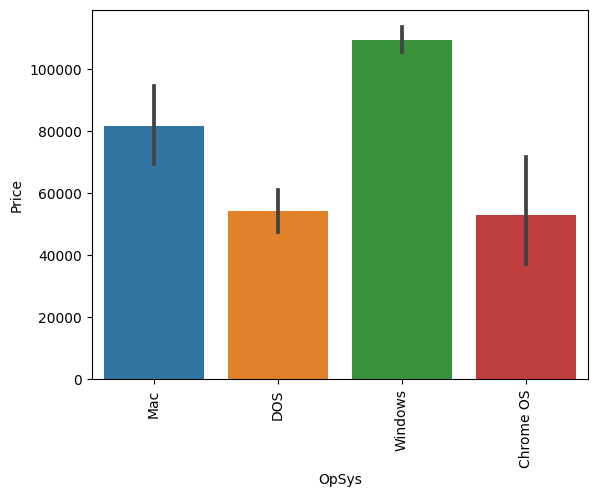

In [73]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
import numpy as np

In [75]:
new_df=df.drop(columns=['laptop_ID','Memory','Product'])

In [76]:
X=new_df.drop(columns=['Price'])
y=np.log(new_df['Price'])

In [77]:
X=pd.get_dummies(X,['Company','TypeName','OpSys','CPU Company','Gpu Company'],dtype=int)

In [78]:
X

,Weight,RAM,isTouchScreen,isIPS,PPI,SSD,HDD,Company_Acer,Company_Apple,Company_Asus,...,OpSys_Mac,OpSys_Windows,CPU Company_AMD Processor,CPU Company_Intel Core i3,CPU Company_Intel Core i5,CPU Company_Intel Core i7,CPU Company_Old Intel Processor,Gpu Company_AMD,Gpu Company_Intel,Gpu Company_Nvidia
0,1.37,8,0,1,226.983005,128,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,1.34,8,0,0,127.677940,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
2,1.86,8,0,0,141.211998,256,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,1.83,16,0,1,220.534624,512,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
4,1.37,8,0,1,226.983005,256,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2.40,4,0,0,125.367428,128,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1095,2.40,8,0,0,141.211998,256,1000,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1096,2.36,8,0,0,141.211998,0,1000,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1097,2.60,8,0,0,127.335675,256,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [79]:
y

0       11.713358
1       11.314381
2       10.867535
3       12.352079
4       12.010704
          ...    
1094    11.890298
1095    11.196525
1096    10.972756
1097    11.890298
1098    10.727773
Name: Price, Length: 1099, dtype: float64

## Step 5 : Scaling Data and Fitting The Regression Model

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
st=MinMaxScaler()

In [82]:
X=st.fit_transform(X)

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=221)

In [86]:
X

array([[0.16957607, 0.09677419, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.16209478, 0.09677419, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.29177059, 0.09677419, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.41645885, 0.09677419, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.47630923, 0.09677419, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.31670825, 0.03225806, 0.        , ..., 0.        , 1.        ,
        0.        ]])

### 1. Linear Regression

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [89]:
pred=model.predict(X_test)

In [90]:
from sklearn.metrics import r2_score

In [91]:
print("R2 Score :",r2_score(pred,y_test))

R2 Score : 0.7573424583305113


### 2. Random Forest Regressor 

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
regressor = RandomForestRegressor(n_estimators=200,random_state=30,oob_score=True)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=30)

In [142]:
y_pred = regressor.predict(X_test)

In [143]:
regressor.oob_score_

0.8715545871591861